# <center>CQF Exam One<center>
#### <center>June 2022 Cohort<center>
#### <center>Zhizhao Wang<center>

In [1]:
# CODE FOR CQF EXAM ONE
import math
from numpy import *
from numpy.linalg import multi_dot
from scipy.stats import norm
from pandas import ExcelWriter

# Import matplotlib for visualization
import matplotlib
import matplotlib.pyplot as plt

# Plot settings
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 2.0

import pandas as pd
# Import cufflinks
import cufflinks as cf
cf.set_config_file(offline=True, dimensions=((1000,600)))
# Import plotly express for EF plot
import plotly.express as px
px.defaults.template, px.defaults.width, px.defaults.height = "plotly_white", 1000, 600

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### A.3

In [2]:
# CODE FOR CQF EXAM ONE QUSTION A.3
def binomial_call_option(spot, strike, rate, sigma, time, steps):
    """
    binomial_call_option(spot, strike, rate, sigma, time, steps, output=0)
    
    Function for building binomial option tree for european call option value. 
    
    Parameters
    ----------
    spot        int or float   - spot price
    strike      int or float   - strike price 
    rate        float          - interest rate
    sigma       float          - volatility
    time        int or float   - expiration time
    steps       int            - number of time steps
    
    Returns
    ----------
    out : float
    option value
    """
    # here I use the continuous-time exp form for calculation instead of 1+x form.
    ts = time/steps
    #u = 1 + sigma*math.sqrt(ts)
    #v = 1 - sigma*math.sqrt(ts)
    u = math.exp(sigma * math.sqrt(ts))  # up movement
    v = 1 / u  # down movement
    #df = 1/(1+rate*ts)
    df = math.exp(-rate*ts)
    #p = 0.5 + rate*math.sqrt(ts)/(2*sigma)
    p = (math.exp(rate*ts) - v) / (u - v)
    
    
    # initialize arrays
    px = zeros((steps+1, steps+1))                  # price path
    cp = zeros((steps+1, steps+1))                  # call intrinsic payoff
    V = zeros((steps+1, steps+1))                   # option value
    d = zeros((steps+1, steps+1))                   # delta value
    
    # forward loop
    for j in range(steps+1):
        for i in range(j+1):
            px[i,j] = spot * power(v,i) * power(u, j-i)
            cp[i,j] = maximum(px[i,j] - strike, 0)
            
    # reverse loop
    for j in range(steps+1, 0, -1):
        for i in range(j):
            if(j==steps+1):
                V[i,j-1] = cp[i,j-1]
                d[i,j-1] = 0
            else:
                V[i,j-1] = df*(V[i,j]*p + (1-p)*V[i+1,j])
                d[i,j-1] = (V[i,j]-V[i+1,j])/(px[i,j]-px[i+1,j])
    
    result = around(V,3)[0,0]
    return result

In [3]:
# (a)
spot = 100
strike = 100
rate = 0.05
time = 1
steps = 4
sigma_x = array(range(20,1001,5))/1000
value_y = []

for sigma in sigma_x:
    value_y.append(binomial_call_option(spot, strike, rate, sigma, time, steps))
value_y = array(value_y)
value_y

array([ 4.861,  4.877,  4.884,  4.914,  4.97 ,  5.048,  5.144,  5.253,
        5.373,  5.502,  5.638,  5.78 ,  5.926,  6.077,  6.231,  6.388,
        6.548,  6.709,  6.872,  7.037,  7.204,  7.371,  7.54 ,  7.71 ,
        7.881,  8.052,  8.224,  8.397,  8.57 ,  8.744,  8.918,  9.092,
        9.267,  9.443,  9.618,  9.794,  9.971, 10.147, 10.324, 10.5  ,
       10.677, 10.855, 11.032, 11.209, 11.387, 11.565, 11.743, 11.92 ,
       12.098, 12.276, 12.455, 12.633, 12.811, 12.989, 13.167, 13.346,
       13.524, 13.702, 13.881, 14.059, 14.237, 14.416, 14.594, 14.772,
       14.951, 15.129, 15.307, 15.486, 15.664, 15.842, 16.02 , 16.198,
       16.376, 16.554, 16.732, 16.91 , 17.088, 17.266, 17.444, 17.622,
       17.799, 17.977, 18.154, 18.332, 18.509, 18.687, 18.864, 19.041,
       19.218, 19.395, 19.572, 19.749, 19.926, 20.102, 20.279, 20.455,
       20.632, 20.808, 20.984, 21.161, 21.337, 21.513, 21.688, 21.864,
       22.04 , 22.215, 22.391, 22.566, 22.741, 22.916, 23.091, 23.266,
      

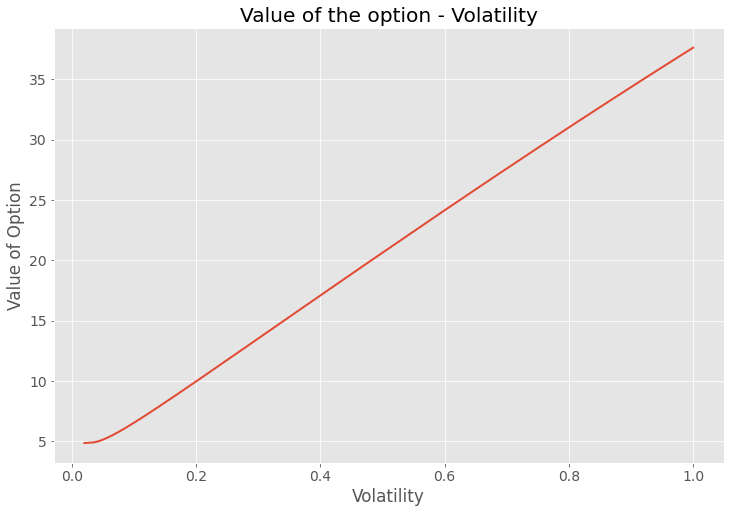

In [4]:
# Visualize the plot to verify the data
plt.plot(sigma_x, value_y)
plt.xlabel('Volatility')
plt.ylabel('Value of Option')
plt.title('Value of the option - Volatility');

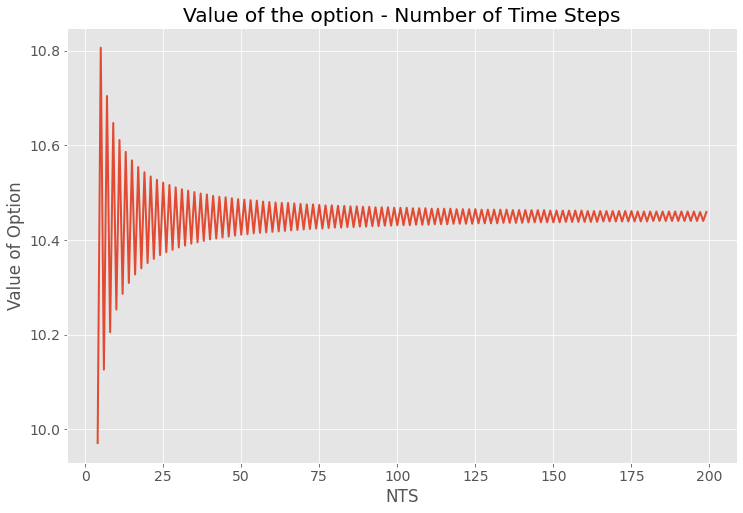

In [5]:
# (b)
sigma = 0.2
steps_x = array(range(4,200))
value_y = []
for steps in steps_x:
    value_y.append(binomial_call_option(spot, strike, rate, sigma, time, steps))
value_y = array(value_y)
plt.plot(steps_x, value_y)
plt.xlabel('NTS')
plt.ylabel('Value of Option')
plt.title('Value of the option - Number of Time Steps');

### B.1

In [6]:
mu_vec = array([0.04,0.08,0.12,0.15])[:, newaxis]
mu_vec

array([[0.04],
       [0.08],
       [0.12],
       [0.15]])

In [7]:
sigma_mat = array([[0.07,0,0,0],
                  [0,0.12,0,0],
                  [0,0,0.18,0],
                  [0,0,0,0.26]])
sigma_mat

array([[0.07, 0.  , 0.  , 0.  ],
       [0.  , 0.12, 0.  , 0.  ],
       [0.  , 0.  , 0.18, 0.  ],
       [0.  , 0.  , 0.  , 0.26]])

In [8]:
R_mat = array([[1,0.2,0.5,0.3],
          [0.2,1,0.7,0.4],
          [0.5,0.7,1,0.9],
          [0.3,0.4,0.9,1]])
R_mat

array([[1. , 0.2, 0.5, 0.3],
       [0.2, 1. , 0.7, 0.4],
       [0.5, 0.7, 1. , 0.9],
       [0.3, 0.4, 0.9, 1. ]])

In [9]:
cov_mat = multi_dot([sigma_mat.T, R_mat, sigma_mat])
cov_mat

array([[0.0049 , 0.00168, 0.0063 , 0.00546],
       [0.00168, 0.0144 , 0.01512, 0.01248],
       [0.0063 , 0.01512, 0.0324 , 0.04212],
       [0.00546, 0.01248, 0.04212, 0.0676 ]])

In [10]:
one_vec = array([1,1,1,1])[:, newaxis]
one_vec

array([[1],
       [1],
       [1],
       [1]])

### B.2

**Solve this optimization using the Lagrangian method:**

In [11]:
cov_inv = linalg.inv(cov_mat)
cov_inv

array([[ 1301.39012127,  1086.95652174, -1909.36277893,   883.89870999],
       [ 1086.95652174,  1207.7294686 , -1952.49597424,   905.79710145],
       [-1909.36277893, -1952.49597424,  3390.58865629, -1597.91898922],
       [  883.89870999,   905.79710145, -1597.91898922,   771.80344739]])

In [12]:
A = multi_dot([one_vec.T, cov_inv,one_vec])
B = multi_dot([mu_vec.T, cov_inv,one_vec])
C = multi_dot([mu_vec.T, cov_inv,mu_vec])
(A,B,C)

(array([[1505.26087512]]), array([[50.58862248]]), array([[1.96129471]]))

In [13]:
lamb = (A*0.1-B)/(A*C-B*B)
gamma = (C-B*0.1)/(A*C-B*B)
(lamb, gamma)

(array([[0.25426051]]), array([[-0.00788082]]))

In [14]:
omega = dot(cov_inv,(lamb*mu_vec + gamma*one_vec))
omega

array([[ 0.05867697],
       [ 0.75902696],
       [-0.31954512],
       [ 0.50184119]])

**Compute the standard deviation of this optimal portfolio:**

In [15]:
p_std = sqrt(multi_dot([omega.T, cov_mat, omega]))
p_std

array([[0.13245841]])

**On a graph of expected returns plotted against standard deviation, identify this optimal portfolio**

In [16]:
def portfolio_simulation():
    # Initialize the lists
    rets = []; vols = []; wts = []
    # Simulate 10,000 portfolios
    for i in range(10000):
        weights = (random.random(4)-0.5)[:,newaxis]  # to have some negative weights
        weights /= sum(weights)  
        
        rets.append(multi_dot([weights.T, mu_vec]))
        vols.append(sqrt(multi_dot([weights.T, cov_mat, weights])))
        wts.append(weights.flatten())
    
    # Create a dataframe for analysis
    portdf = 100*pd.DataFrame({
        'port_rets': array(rets).flatten(),
        'port_vols': array(vols).flatten(),
        'weights': list(array(wts))
    })

    return round(portdf, 2)

In [17]:
temp = portfolio_simulation()
temp

,port_rets,port_vols,weights
0,6.62,9.81,"[54.08979224012829, 5.780963374276027, 67.4161..."
1,11.86,22.05,"[53.065909217087736, -49.75671069204877, 26.08..."
2,33.12,68.70,"[-348.8068672790891, 481.15067335501067, -447...."
3,12.84,18.79,"[-27.966648709776205, 54.984064187705094, 46.3..."
4,-1.66,22.06,"[156.34766961051616, -96.86102874895816, 207.9..."
...,...,...,...
9995,11.63,16.71,"[-15.126939025937755, 44.09760464861448, 65.01..."
9996,9.21,12.31,"[27.59707311833896, 28.15639890418065, 26.1477..."
9997,10.12,14.26,"[26.240204753936275, 19.48373544315326, 21.090..."
9998,10.64,14.55,"[4.2917957120387245, 64.53853147143181, -21.13..."


In [18]:
# Plot simulated portfolio
fig = px.scatter(
    temp, x='port_vols', y='port_rets', 
    labels={'port_vols': 'Standard Deviation', 'port_rets': 'Expected Return'},
    title="Expected Return - Standard Deviation"
     ).update_traces(mode='markers', marker=dict(symbol='circle-dot'),opacity = 0.09)

# Plot Assets A, B, C, D and the optimal
vol = [item*100 for item in [0.07, 0.12, 0.18, 0.26]]
res = [item*100 for item in [0.04, 0.08, 0.12, 0.15]]
assets = ['A', 'B', 'C', 'D']
for i in range(len(assets)):
    fig.add_scatter(
    mode='markers', 
    x=[vol[i]], 
    y=[res[i]], 
    marker=dict(color='Black', size=10, symbol='cross'),
    name = assets[i]
    ).update(layout_showlegend=False)
    
fig.add_scatter(
    mode='markers', 
    x=[0.13245841*100], 
    y=[0.1*100], 
    marker=dict(color='Red', size=20, symbol='star'),
    name = 'Optimal Portfolio',
    text = 'Optimal Portfolio'
    ).update(layout_showlegend=False)

# Show spikes
fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)
fig.show()

### B.3

**Solve this optimization using the Lagrangian method:**

In [19]:
omega = dot(cov_inv,one_vec)/A
omega

array([[ 0.90541287],
       [ 0.82908361],
       [-1.37463819],
       [ 0.64014171]])

**Compute the return and standard deviation of this optimal portfolio:**

In [20]:
mu_3 = dot(omega.T, mu_vec)
mu_3

array([[0.03360788]])

In [21]:
sigma_3 = sqrt(multi_dot([omega.T, cov_mat, omega]))
sigma_3

array([[0.02577473]])

**On a graph of expected returns plotted against standard deviation, identify and name this optimal portfolio:**

In [22]:
fig.add_scatter(
    mode='markers', 
    x=[0.02577473*100], 
    y=[0.03360788*100], 
    marker=dict(color='Green', size=20, symbol='star'),
    name = 'Global Minimum Variance Portfolio',
    ).update(layout_showlegend=False)
fig.show()

### C.1

In [23]:
# Load the FTSE 100 index return data 
df = pd.read_excel(r'FTSE100.xlsx', index_col=0, parse_dates=True, header=1)
# Check values 
df.head()

,Closing Price
Date,
2009-07-22,4493.73
2009-07-23,4559.80
2009-07-24,4576.61
2009-07-27,4586.13
2009-07-28,4528.84


In [24]:
# Calculate the return
df['Returns'] = log(df['Closing Price']).diff().dropna()
# Calculate mean and standard deviation 
df.head()

,Closing Price,Returns
Date,,
2009-07-22,4493.73,NaN
2009-07-23,4559.80,0.014596
2009-07-24,4576.61,0.003680
2009-07-27,4586.13,0.002078
2009-07-28,4528.84,-0.012571


In [25]:
# Calculate the rolling 10-day future index return
df['10D Returns'] = df['Returns'].rolling(window=10).sum().shift(-10).dropna()
# Calculate the rolling 21-day sample standard deviation
df['Standard Deviation'] = df['Returns'].rolling(window=21).std().dropna()

In [26]:
# Project the standard deviation from 1-day to 10-day
df['10D Standard Deviation'] = df['Standard Deviation'] * sqrt(10)
df[7:25]

,Closing Price,Returns,10D Returns,Standard Deviation,10D Standard Deviation
Date,,,,,
2009-07-31,4608.36,-0.005032,0.022658,NaN,NaN
2009-08-03,4682.46,0.015952,-0.008030,NaN,NaN
2009-08-04,4671.37,-0.002371,0.003080,NaN,NaN
2009-08-05,4647.13,-0.005203,0.009112,NaN,NaN
2009-08-06,4690.53,0.009296,0.013983,NaN,NaN
2009-08-07,4731.56,0.008709,0.024907,NaN,NaN
2009-08-10,4722.20,-0.001980,0.036191,NaN,NaN
2009-08-11,4671.34,-0.010829,0.051212,NaN,NaN
2009-08-12,4716.76,0.009676,0.036189,NaN,NaN


In [27]:
# Using constant mean for the whole dataset scaled over 10-day
mu_10D = df['Returns'].mean() * 10
mu_10D

0.003859352808010609

In [28]:
df['VaR_sample'] = norm.ppf(1-0.99, mu_10D, df['10D Standard Deviation'])
df[15:25]

,Closing Price,Returns,10D Returns,Standard Deviation,10D Standard Deviation,VaR_sample
Date,,,,,,
2009-08-12,4716.76,0.009676,0.036189,NaN,NaN,NaN
2009-08-13,4755.46,0.008171,0.023667,NaN,NaN,NaN
2009-08-14,4713.97,-0.008763,0.040519,NaN,NaN,NaN
2009-08-17,4645.01,-0.014737,0.036918,NaN,NaN,NaN
2009-08-18,4685.78,0.008739,0.027733,NaN,NaN,NaN
2009-08-19,4689.67,0.000830,0.022576,NaN,NaN,NaN
2009-08-20,4756.58,0.014167,0.019800,0.009787,0.030949,-0.068138
2009-08-21,4850.89,0.019633,0.016822,0.010148,0.032091,-0.070795
2009-08-24,4896.23,0.009303,0.010385,0.010242,0.032388,-0.071487


### C.2

In [29]:
# Calculate the initial value of the volatility
var0 = df['Returns'].var()
var0

0.00011759255521508201

In [30]:
# GARCH(1,1) model by recursive calculation
def garch(var0, ret):
    """
    var0  -float     the initial variance of the GARCH model
    ret   -Series    the realised returns 
    """
    omega = 0.000001
    alpha = 0.047
    beta = 0.9466
    var = []
    for i in range(len(ret)):
        if i==0:
            var.append(nan)
        elif i==1:     
            var.append(var0)
        else:   
            var.append(omega + alpha * ret[i-1]**2 + beta * var[i-1])      
    return array(var)

# get the 1-day volatility
df['GARCH vol'] = sqrt(garch(var0, df['Returns']))
df

,Closing Price,Returns,10D Returns,Standard Deviation,10D Standard Deviation,VaR_sample,GARCH vol
Date,,,,,,,
2009-07-22,4493.73,NaN,0.033567,NaN,NaN,NaN,NaN
2009-07-23,4559.80,0.014596,0.028267,NaN,NaN,NaN,0.010844
2009-07-24,4576.61,0.003680,0.033296,NaN,NaN,NaN,0.011060
2009-07-27,4586.13,0.002078,0.029238,NaN,NaN,NaN,0.010837
2009-07-28,4528.84,-0.012571,0.030980,NaN,NaN,NaN,0.010600
...,...,...,...,...,...,...,...
2013-07-15,6586.11,0.006271,NaN,0.012694,0.040141,-0.089522,0.011583
2013-07-16,6556.35,-0.004529,NaN,0.012768,0.040377,-0.090073,0.011395
2013-07-17,6571.93,0.002374,NaN,0.012714,0.040206,-0.089673,0.011175


In [31]:
df['10D GARCH vol'] = df['GARCH vol'] * sqrt(10)
df

,Closing Price,Returns,10D Returns,Standard Deviation,10D Standard Deviation,VaR_sample,GARCH vol,10D GARCH vol
Date,,,,,,,,
2009-07-22,4493.73,NaN,0.033567,NaN,NaN,NaN,NaN,NaN
2009-07-23,4559.80,0.014596,0.028267,NaN,NaN,NaN,0.010844,0.034292
2009-07-24,4576.61,0.003680,0.033296,NaN,NaN,NaN,0.011060,0.034975
2009-07-27,4586.13,0.002078,0.029238,NaN,NaN,NaN,0.010837,0.034268
2009-07-28,4528.84,-0.012571,0.030980,NaN,NaN,NaN,0.010600,0.033520
...,...,...,...,...,...,...,...,...
2013-07-15,6586.11,0.006271,NaN,0.012694,0.040141,-0.089522,0.011583,0.036628
2013-07-16,6556.35,-0.004529,NaN,0.012768,0.040377,-0.090073,0.011395,0.036034
2013-07-17,6571.93,0.002374,NaN,0.012714,0.040206,-0.089673,0.011175,0.035338


In [32]:
df['VaR_Garch'] = norm.ppf(1-0.99, mu_10D, df['10D GARCH vol'])
df

,Closing Price,Returns,10D Returns,Standard Deviation,10D Standard Deviation,VaR_sample,GARCH vol,10D GARCH vol,VaR_Garch
Date,,,,,,,,,
2009-07-22,4493.73,NaN,0.033567,NaN,NaN,NaN,NaN,NaN,NaN
2009-07-23,4559.80,0.014596,0.028267,NaN,NaN,NaN,0.010844,0.034292,-0.075915
2009-07-24,4576.61,0.003680,0.033296,NaN,NaN,NaN,0.011060,0.034975,-0.077505
2009-07-27,4586.13,0.002078,0.029238,NaN,NaN,NaN,0.010837,0.034268,-0.075860
2009-07-28,4528.84,-0.012571,0.030980,NaN,NaN,NaN,0.010600,0.033520,-0.074121
...,...,...,...,...,...,...,...,...,...
2013-07-15,6586.11,0.006271,NaN,0.012694,0.040141,-0.089522,0.011583,0.036628,-0.081350
2013-07-16,6556.35,-0.004529,NaN,0.012768,0.040377,-0.090073,0.011395,0.036034,-0.079968
2013-07-17,6571.93,0.002374,NaN,0.012714,0.040206,-0.089673,0.011175,0.035338,-0.078348


### C.3

In [33]:
# Plot 10-day index return & 10-day 99% VaR measured by using a sample standard deviation
df[['10D Returns','VaR_sample']].iplot(title=r'10-Day Index Return & VaR(99%,10D) by sample standard deviation measure')

In [34]:
# Plot 10-day index return & 10-day 99% VaR measured by using a sample standard deviation
df[['10D Returns','VaR_Garch']].iplot(title=r'10-Day Index Return & VaR(99%,10D) by GARCH measure')

In [35]:
# All the dates that the realised 10-day index return is below the VaR (sample standard deviation)
df[['Standard Deviation','10D Returns', 'VaR_sample']][df['10D Returns'] < df['VaR_sample']]

,Standard Deviation,10D Returns,VaR_sample
Date,,,
2010-01-14,0.008478,-0.066252,-0.058511
2010-04-14,0.005497,-0.036838,-0.036577
2010-04-15,0.005296,-0.036213,-0.035104
2010-04-19,0.006293,-0.056896,-0.042439
2010-04-20,0.006585,-0.079455,-0.044580
2010-04-21,0.007058,-0.084249,-0.048060
2010-04-22,0.007438,-0.100621,-0.050861
2010-04-23,0.007688,-0.060540,-0.052696
2010-04-26,0.007760,-0.075728,-0.053229


In [36]:
# All the dates that the realised 10-day index return is below the VaR (GARCH)
df[['GARCH vol','10D Returns', 'VaR_Garch']][df['10D Returns'] < df['VaR_Garch']]

,GARCH vol,10D Returns,VaR_Garch
Date,,,
2010-04-19,0.008135,-0.056896,-0.055985
2010-04-20,0.008001,-0.079455,-0.054998
2010-04-21,0.008124,-0.084249,-0.055909
2010-04-22,0.008285,-0.100621,-0.057088
2010-04-23,0.008418,-0.060540,-0.058069
2010-04-26,0.008545,-0.075728,-0.059000
2010-06-21,0.013203,-0.094033,-0.093270
2011-07-21,0.009729,-0.089806,-0.067715
2011-07-22,0.009669,-0.123216,-0.067272


In [37]:
# calculate the number of breaches for each measure
numofbreach1 = len(df['Returns'][df['10D Returns'] < df['VaR_sample']])
numofbreach2 = len(df['Returns'][df['10D Returns'] < df['VaR_Garch']])
print("Number of breaches by sample standard deviation measure for VaR:", numofbreach1)
print("Number of breaches by GARCH measure for VaR:", numofbreach2)
# calculate the number of comparisons available for each measure
N1 = df['VaR_sample'].count() - 10
N2 = df['VaR_Garch'].count() - 10
print("Number of comparison by sample standard deviation measure for VaR:", N1)
print("Number of comparison by GARCH measure for VaR:", N2)
# calculate the percentage of breaches for each measure
print("The percentage of breaches by sample standard deviation measure for VaR:", numofbreach1/N1*100,"%")
print("The percentage of breaches by GARCH measure for VaR:", numofbreach2/N2*100,"%")

Number of breaches by sample standard deviation measure for VaR: 27
Number of breaches by GARCH measure for VaR: 22
Number of comparison by sample standard deviation measure for VaR: 978
Number of comparison by GARCH measure for VaR: 998
The percentage of breaches by sample standard deviation measure for VaR: 2.7607361963190185 %
The percentage of breaches by GARCH measure for VaR: 2.2044088176352705 %


In [38]:
# iid behavior with respect to time
df['Breach_sample'] = df['Standard Deviation'][df['10D Returns'] < df['VaR_sample']]
df['Breach_Garch'] = df['GARCH vol'][df['10D Returns'] < df['VaR_Garch']]
df

,Closing Price,Returns,10D Returns,Standard Deviation,10D Standard Deviation,VaR_sample,GARCH vol,10D GARCH vol,VaR_Garch,Breach_sample,Breach_Garch
Date,,,,,,,,,,,
2009-07-22,4493.73,NaN,0.033567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-07-23,4559.80,0.014596,0.028267,NaN,NaN,NaN,0.010844,0.034292,-0.075915,NaN,NaN
2009-07-24,4576.61,0.003680,0.033296,NaN,NaN,NaN,0.011060,0.034975,-0.077505,NaN,NaN
2009-07-27,4586.13,0.002078,0.029238,NaN,NaN,NaN,0.010837,0.034268,-0.075860,NaN,NaN
2009-07-28,4528.84,-0.012571,0.030980,NaN,NaN,NaN,0.010600,0.033520,-0.074121,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2013-07-15,6586.11,0.006271,NaN,0.012694,0.040141,-0.089522,0.011583,0.036628,-0.081350,NaN,NaN
2013-07-16,6556.35,-0.004529,NaN,0.012768,0.040377,-0.090073,0.011395,0.036034,-0.079968,NaN,NaN
2013-07-17,6571.93,0.002374,NaN,0.012714,0.040206,-0.089673,0.011175,0.035338,-0.078348,NaN,NaN


In [39]:
fig2 = px.line(df, x=df.index, y='Standard Deviation',title='Breaches & Dates & Volatility by sample standard deviation measure').update_traces()
fig2.add_scatter(
    mode='markers', 
    x = df.index,
    y = df['Breach_sample'], 
    marker=dict(color='Red', size=10, symbol='cross'),
    ).update(layout_showlegend=False)
# Show spikes
fig2.update_xaxes(showspikes=True)
fig2.update_yaxes(showspikes=True)
fig2.show()

In [40]:
fig3 = px.line(df, x=df.index, y='GARCH vol',title='Breaches & Dates & Volatility by GARCH measure').update_traces()
fig3.add_scatter(
    mode='markers', 
    x = df.index,
    y = df['Breach_Garch'], 
    marker=dict(color='Red', size=10, symbol='cross'),
    ).update(layout_showlegend=False)
# Show spikes
fig3.update_xaxes(showspikes=True)
fig3.update_yaxes(showspikes=True)
fig3.show()

In [41]:
def ratio(vol, data_vol, data_VaR, Nb, No):
    a = data_vol[df['10D Returns'] <  data_VaR]
    count = 0
    for i in range(len(a)):
        if a[i] >= vol and a[i] < vol+0.001:
            count = count + 1

    count_vol= 0
    for j in range(len(data_vol)):
        if data_vol[j] >= vol and data_vol[j] < vol+0.001:
            count_vol = count_vol + 1
    p1 = count/Nb*100
    p2 = count_vol/No*100
    p3 = count/count_vol * 100
    ratio = p3/(Nb/No*100)
    print('| [' + "{:.3f}".format(vol) + ', ' + "{:.3f}".format(vol + 0.001) + ') ' + '| ' + str(round(p1,2)) + '% ' + '| ' + str(round(p2,2)) + '% ' + '| ' + str(round(p3,2)) + '% '+ '| '+ str(round(ratio,2)) + ' ')
    return 

for vol in range(3,20):
    ratio(vol/1000, df['Standard Deviation'], df['VaR_sample'], numofbreach1, N1)


| [0.003, 0.004) | 0.0% | 0.82% | 0.0% | 0.0 
| [0.004, 0.005) | 3.7% | 0.51% | 20.0% | 7.24 
| [0.005, 0.006) | 11.11% | 3.99% | 7.69% | 2.79 
| [0.006, 0.007) | 14.81% | 8.38% | 4.88% | 1.77 
| [0.007, 0.008) | 25.93% | 14.11% | 5.07% | 1.84 
| [0.008, 0.009) | 29.63% | 16.36% | 5.0% | 1.81 
| [0.009, 0.010) | 7.41% | 15.13% | 1.35% | 0.49 
| [0.010, 0.011) | 0.0% | 10.12% | 0.0% | 0.0 
| [0.011, 0.012) | 3.7% | 8.69% | 1.18% | 0.43 
| [0.012, 0.013) | 3.7% | 7.67% | 1.33% | 0.48 
| [0.013, 0.014) | 0.0% | 2.66% | 0.0% | 0.0 
| [0.014, 0.015) | 0.0% | 3.78% | 0.0% | 0.0 
| [0.015, 0.016) | 0.0% | 0.92% | 0.0% | 0.0 
| [0.016, 0.017) | 0.0% | 0.2% | 0.0% | 0.0 
| [0.017, 0.018) | 0.0% | 0.92% | 0.0% | 0.0 
| [0.018, 0.019) | 0.0% | 0.92% | 0.0% | 0.0 
| [0.019, 0.020) | 0.0% | 0.92% | 0.0% | 0.0 


In [42]:
for vol in range(7,20):
    ratio(vol/1000, df['GARCH vol'], df['VaR_Garch'], numofbreach2, N2)

| [0.007, 0.008) | 9.09% | 8.32% | 2.41% | 1.09 
| [0.008, 0.009) | 31.82% | 18.84% | 3.72% | 1.69 
| [0.009, 0.010) | 40.91% | 21.84% | 4.13% | 1.87 
| [0.010, 0.011) | 13.64% | 19.34% | 1.55% | 0.71 
| [0.011, 0.012) | 0.0% | 10.12% | 0.0% | 0.0 
| [0.012, 0.013) | 0.0% | 5.61% | 0.0% | 0.0 
| [0.013, 0.014) | 4.55% | 2.61% | 3.85% | 1.74 
| [0.014, 0.015) | 0.0% | 2.81% | 0.0% | 0.0 
| [0.015, 0.016) | 0.0% | 2.0% | 0.0% | 0.0 
| [0.016, 0.017) | 0.0% | 2.2% | 0.0% | 0.0 
| [0.017, 0.018) | 0.0% | 2.0% | 0.0% | 0.0 
| [0.018, 0.019) | 0.0% | 1.6% | 0.0% | 0.0 
| [0.019, 0.020) | 0.0% | 1.4% | 0.0% | 0.0 


In [43]:
# translate into boolean form
df['Breach_sample'][df['Breach_sample'].notnull()] = 1
df['Breach_sample'].fillna(0)
df['Breach_Garch'][df['Breach_Garch'].notnull()] = 1
df['Breach_Garch'].fillna(0)

Date
2009-07-22    0.0
2009-07-23    0.0
2009-07-24    0.0
2009-07-27    0.0
2009-07-28    0.0
             ... 
2013-07-15    0.0
2013-07-16    0.0
2013-07-17    0.0
2013-07-18    0.0
2013-07-19    0.0
Name: Breach_Garch, Length: 1009, dtype: float64

In [44]:
# Storing the fetched data in a separate sheet for each security
writer = ExcelWriter('WANG_VaR.xlsx')

# df.to_excel() - this is list comprehension
[pd.DataFrame(df[['Closing Price', 'Returns', 'Standard Deviation', 'VaR_sample', '10D Returns', 'Breach_sample']]).to_excel(writer,'sample standard deviation'),
pd.DataFrame(df[['Closing Price', 'Returns', 'GARCH vol', 'VaR_Garch', '10D Returns', 'Breach_Garch']]).to_excel(writer,'Garch')] 

# save file
writer.save() 